In [4]:
!pip install colorama catboost shap

In [5]:
# EDA
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from colorama import Fore, Back, Style

# Visualização
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss, roc_curve, \
                            roc_auc_score, f1_score, precision_score, recall_score

# interpretabilidade
import shap

# Carga dos dados

In [8]:
df_empresas = pd.read_csv('./companies_profile.csv')

In [9]:
df_empresas.head()

,ID,Nome_Empresa,Receita_Anual,Margem_Liquida,Endividamento,Setor,Regiao,Tempo_Operacao,Auditoria_Externa,Rating_Credito,...,Estrategia_Expansao,Gestao_Risco,Cobertura_Seguros,Maturidade_Digital,Governanca_Corporativa,Cultura_Inovacao,Relacao_Comunidade,Risco_Credito,Risco_Compliance,Risco_Mercado
0,1,Hahn Group,6523388,0.482879,1.032767,Manufatura,Europa,26,0,0.938715,...,Parcerias,Centralizada,Básica,Avançada,Fraca,Neutra,Regular,0,0,0
1,2,Lopez Group,6650634,0.121292,0.492841,Tecnologia,Europa,20,1,0.492362,...,Orgânica,Centralizada,Básica,Inicial,Média,Neutra,Ruim,0,0,0
2,3,Sparks and Sons,4404572,0.190114,0.757099,Manufatura,América Latina,6,0,0.700866,...,Orgânica,Decentralizada,Básica,Inicial,Alta,Neutra,Boa,0,0,0
3,4,"Fields, Ramirez and Craig",2334489,0.402442,2.327962,Manufatura,Europa,6,1,0.855551,...,Parcerias,Centralizada,Nenhuma,Intermediária,Média,Inovadora,Excelente,1,0,0
4,5,"Campbell, Hernandez and Lyons",9624682,0.174549,1.722357,Saúde,América do Norte,18,1,0.418291,...,Aquisições,Decentralizada,Nenhuma,Avançada,Fraca,Neutra,Regular,0,0,0


In [10]:
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1000 non-null   int64  
 1   Nome_Empresa               1000 non-null   object 
 2   Receita_Anual              1000 non-null   int64  
 3   Margem_Liquida             1000 non-null   float64
 4   Endividamento              1000 non-null   float64
 5   Setor                      1000 non-null   object 
 6   Regiao                     1000 non-null   object 
 7   Tempo_Operacao             1000 non-null   int64  
 8   Auditoria_Externa          1000 non-null   int64  
 9   Rating_Credito             1000 non-null   float64
 10  Tipo_Empresa               1000 non-null   object 
 11  Politica_Sustentabilidade  1000 non-null   object 
 12  Estrategia_Expansao        1000 non-null   object 
 13  Gestao_Risco               1000 non-null   object

# EDA

In [11]:
df_empresas.describe()

,ID,Receita_Anual,Margem_Liquida,Endividamento,Tempo_Operacao,Auditoria_Externa,Rating_Credito,Risco_Credito,Risco_Compliance,Risco_Mercado
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.992928e+06,0.152379,1.317909,25.367000,0.496000,0.487000,0.595000,0.206000,0.110000
std,288.819436,2.804931e+06,0.199511,0.700616,14.103873,0.500234,0.292846,0.491138,0.404633,0.313046
min,1.000000,1.393530e+05,-0.199834,0.100452,1.000000,0.000000,0.000748,0.000000,0.000000,0.000000
25%,250.750000,2.646178e+06,-0.021089,0.691918,13.000000,0.000000,0.232142,0.000000,0.000000,0.000000
50%,500.500000,5.032603e+06,0.160441,1.364206,25.000000,0.000000,0.475893,1.000000,0.000000,0.000000
75%,750.250000,7.270658e+06,0.323736,1.919788,38.000000,1.000000,0.742092,1.000000,0.000000,0.000000
max,1000.000000,9.989550e+06,0.499547,2.499313,49.000000,1.000000,0.999049,1.000000,1.000000,1.000000


In [12]:
for coluna in list(df_empresas.select_dtypes(object).columns):
    print(f'Coluna: {coluna}')
    print(f'{df_empresas[coluna].value_counts()}\n\n')

Coluna: Nome_Empresa
Nome_Empresa
Davis Inc                       3
Davis Group                     3
Wilson and Sons                 3
Smith PLC                       3
Chavez Ltd                      3
                               ..
Carter PLC                      1
Gregory-Cannon                  1
Pollard-Gillespie               1
Rodriguez, Kidd and Mitchell    1
Schneider-Nguyen                1
Name: count, Length: 969, dtype: int64


Coluna: Setor
Setor
Tecnologia    274
Manufatura    257
Saúde         239
Financeiro    230
Name: count, dtype: int64


Coluna: Regiao
Regiao
América Latina      264
Ásia                254
Europa              246
América do Norte    236
Name: count, dtype: int64


Coluna: Tipo_Empresa
Tipo_Empresa
Multinacional    262
S.A.             257
MEI              253
Limitada         228
Name: count, dtype: int64


Coluna: Politica_Sustentabilidade
Politica_Sustentabilidade
Alta     351
Média    336
Baixa    313
Name: count, dtype: int64


Coluna: Estr

In [13]:
# Troca do tipo das variáveis binárias
for coluna in list(df_empresas.columns):
    if set(df_empresas[coluna].value_counts().index) == {0, 1} :
        df_empresas[coluna] = df_empresas[coluna].astype('category')

df_empresas[df_empresas.select_dtypes(object).columns] = df_empresas[df_empresas.select_dtypes(object).columns].astype('category')


In [14]:
# Lista de variáveis numéricas
features_numericas = df_empresas.select_dtypes([int, float]).drop(columns=['ID'], axis=1)
features_categoricas = df_empresas.select_dtypes('category').drop(columns=['Nome_Empresa'], axis=1)

In [15]:
# Visualização da distribuição das varáveis numéricas

for coluna in list(features_numericas.columns):
    fig = px.histogram(df_empresas, x=coluna, nbins=20)
    fig.show()

In [16]:
# Visualização da distribuição das varáveis categóricas

for coluna in list(features_categoricas.columns):
    fig = px.bar(df_empresas[coluna].value_counts()/len(df_empresas)*100)
    fig.show()

In [17]:
# lista de targets
targets = ['Risco_Credito', 'Risco_Compliance', 'Risco_Mercado']

In [18]:
# Relação entre o target Risco_Credito e as variáveis numéricas

for col_numerica in features_numericas:
    fig = px.box(df_empresas, x=targets[0], y=col_numerica)
    fig.show()

Diante desses gráficos, notamos que há uma possivel relação entre o valor do endividamento e o risco de crédito ser positivo. Além disso, empresas com rating de crédito maior tende a não terem risco de crédito.

In [19]:
# Relação entre o target Risco_Credito e as variáveis categórid

for col_categorica in features_categoricas:
    fig = px.bar(df_empresas, x=targets[0], y=col_categorica)
    fig.show()

In [20]:
# Matriz de correlação

correlation_matrix = df_empresas[list(features_numericas.columns) + targets].corr()
fig = px.imshow(
    correlation_matrix,
    color_continuous_scale = 'armyrose',
    title='Matriz de correlação',
    zmin=-1,
    zmax=1
)

fig.update_traces(text=correlation_matrix, texttemplate='%{text:.1%}', textfont=dict(size=9))

fig.update_layout(
    width=1000,
    height=600
)

# Teste estatístico

In [21]:
# T-Student - (diferença significativa entre média entre 2 grupos)
for col in features_numericas:
    for target in targets:
        groups = [df_empresas [df_empresas [target] == val] [col] for val in df_empresas [target]. unique()]
        if df_empresas [target].nunique() <= 2:
            stat, p = ttest_ind(*groups)
            teste = 'T-Test'
        elif df_empresas [target].nunique() > 2:
            stat, p = f_oneway(*groups)
            teste = 'ANOVA'
        print(f'{Fore.RED if p < 0.05 else Fore.WHITE}'
              f'{teste} entre {col} e {target}: p-valor = {p}')

T-Test entre Receita_Anual e Risco_Credito: p-valor = 0.9148230907469925
T-Test entre Receita_Anual e Risco_Compliance: p-valor = 0.37245390731630845
T-Test entre Receita_Anual e Risco_Mercado: p-valor = 1.4322662899167404e-06
T-Test entre Margem_Liquida e Risco_Credito: p-valor = 0.714839504289611
T-Test entre Margem_Liquida e Risco_Compliance: p-valor = 7.293209908090928e-67
T-Test entre Margem_Liquida e Risco_Mercado: p-valor = 0.4678700538767202
T-Test entre Endividamento e Risco_Credito: p-valor = 2.0286202656673824e-48
T-Test entre Endividamento e Risco_Compliance: p-valor = 0.028739447727093168
T-Test entre Endividamento e Risco_Mercado: p-valor = 0.6427051699118199
T-Test entre Tempo_Operacao e Risco_Credito: p-valor = 0.7368086294717284
T-Test entre Tempo_Operacao e Risco_Compliance: p-valor = 0.687526198825497
T-Test entre Tempo_Operacao e Risco_Mercado: p-valor = 9.253489005940335e-41
T-Test entre Rating_Credito e Risco_Credito: p-valor = 3.050591112630865e-103
T-Test entre 

# Preparação dos dados

In [22]:
# Divisão do X  e Y
lista_col_indice = ['ID', 'Nome_Empresa']
X = df_empresas.drop(columns=lista_col_indice + targets, axis=1)
y = df_empresas[targets]

In [23]:
X['Auditoria_Externa'] = X['Auditoria_Externa'].astype(int)

In [24]:
features_categoricas.drop(columns=['Auditoria_Externa'], axis=1, inplace=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Treinamento do modelo

In [26]:
features_categoricas.drop(columns=targets, axis=1, inplace=True)

In [27]:
# instância do modelo CatBoost
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    cat_features = list(features_categoricas.columns),
    random_strength=2,
    loss_function='Logloss'
)

In [28]:
# Configuração do modelo CatBoost para aderir a abordagem OneVsRest
ovr_model = OneVsRestClassifier(cat_model)

In [29]:
ovr_model.fit(X_train, y_train)

0:	learn: 0.6294599	total: 59.3ms	remaining: 59.2s
1:	learn: 0.5371508	total: 68.3ms	remaining: 34.1s
2:	learn: 0.4570634	total: 73.5ms	remaining: 24.4s
3:	learn: 0.3992278	total: 79.8ms	remaining: 19.9s
4:	learn: 0.3453984	total: 83.9ms	remaining: 16.7s
5:	learn: 0.2879831	total: 86.4ms	remaining: 14.3s
6:	learn: 0.2466229	total: 95.2ms	remaining: 13.5s
7:	learn: 0.2199186	total: 97.6ms	remaining: 12.1s
8:	learn: 0.1955501	total: 106ms	remaining: 11.7s
9:	learn: 0.1666704	total: 110ms	remaining: 10.9s
10:	learn: 0.1487477	total: 113ms	remaining: 10.2s
11:	learn: 0.1338095	total: 124ms	remaining: 10.2s
12:	learn: 0.1238168	total: 138ms	remaining: 10.5s
13:	learn: 0.1154578	total: 141ms	remaining: 9.96s
14:	learn: 0.1006511	total: 150ms	remaining: 9.87s
15:	learn: 0.0906420	total: 159ms	remaining: 9.78s
16:	learn: 0.0819758	total: 164ms	remaining: 9.47s
17:	learn: 0.0743135	total: 167ms	remaining: 9.11s
18:	learn: 0.0669086	total: 170ms	remaining: 8.79s
19:	learn: 0.0614129	total: 173ms

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x788aa1d69b90>)

# Análise dos resultados e métricas

In [30]:
# Configuração da visualização dos dados

pd.set_option('display.float_format', lambda x:'%3.f' % x)
np.set_printoptions(suppress=True, precision=3)

In [31]:
y_pred = ovr_model.predict(X_test)

In [32]:
y_pred.shape

(500, 3)

In [33]:
# Predição das probabilidades
y_pred_proba = ovr_model.predict_proba(X_test)
y_pred_proba

array([[1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   ],
       [0.999, 0.   , 1.   ],
       [0.   , 0.   , 0.   ]])

In [34]:
# Relatório de classificação

print(f'Relatório de classificação')
print(classification_report(y_test, y_pred))

Relatório de classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       0.98      1.00      0.99       105
           2       1.00      1.00      1.00        55

   micro avg       0.99      1.00      1.00       453
   macro avg       0.99      1.00      1.00       453
weighted avg       0.99      1.00      1.00       453
 samples avg       0.71      0.72      0.71       453



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.



0

Matriz de Confusão para Risco_Credito


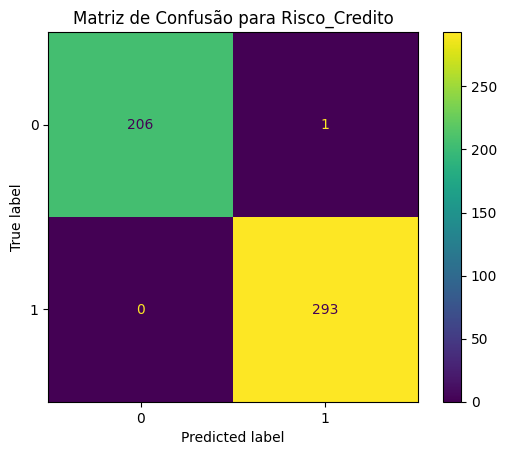

1

Matriz de Confusão para Risco_Compliance


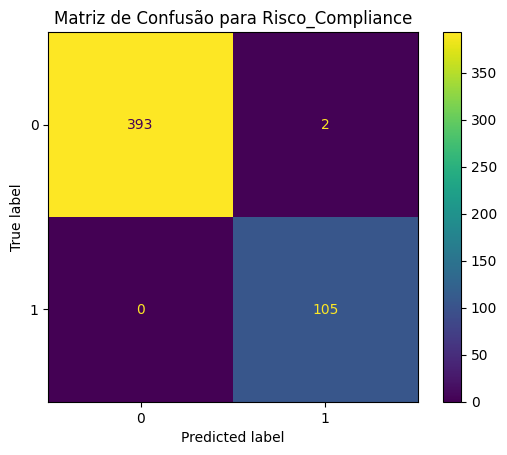

2

Matriz de Confusão para Risco_Mercado


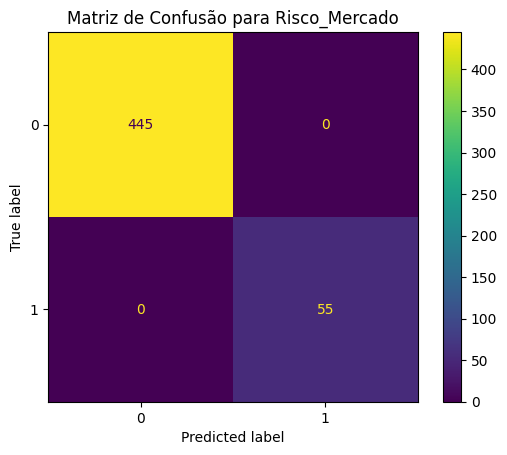

In [35]:
for i, target in enumerate(targets):
    print(i)
    print(f'\nMatriz de Confusão para {target}')
    conf_matrix = confusion_matrix(np.array(y_test.iloc[:, i]), y_pred[:, i])
    fig = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    fig.plot()
    plt.title(f'Matriz de Confusão para {target}')
    plt.show()

In [36]:
# Calculo do logloss para cada target

print('Log loss por target')
for i, target in enumerate(targets):
    log_loss_score = log_loss(np.array(y_test.iloc[:, i]), y_pred[:, i])
    print(f'{target}: {log_loss_score:.4f}')


Log loss por target
Risco_Credito: 0.0721
Risco_Compliance: 0.1442
Risco_Mercado: 0.0000


# Interpretabilidade

In [37]:
# Importância das variáveis - para cada target

for i, target in enumerate(targets):
    # importãncia das features
    importancias = ovr_model.estimators_[i].feature_importances_
    nomes_features = X.columns.tolist()
    df_importancias = pd.DataFrame({'feature': nomes_features, 'importancia': importancias})

    df_importancias = df_importancias.sort_values('importancia', ascending=False).reset_index(drop=True)

    fig = px.bar(
        df_importancias.head(10),
        x='importancia',
        y='feature',
        orientation='h',
        title = f'importancia das 10 primeira features - {target}',
        labels = {'importancia': 'Importancia', 'feature': 'Feature'},
        color='importancia',
        color_continuous_scale='ArmyRose'
    )

    fig.update_layout(
        height=600,
        yaxis={'categoryorder': 'total ascending'}
    )

    fig.show()

In [38]:
y_train.iloc[:,0]

,Risco_Credito
355,0
554,0
591,0
202,0
880,1
...,...
709,0
969,0
736,1
485,1


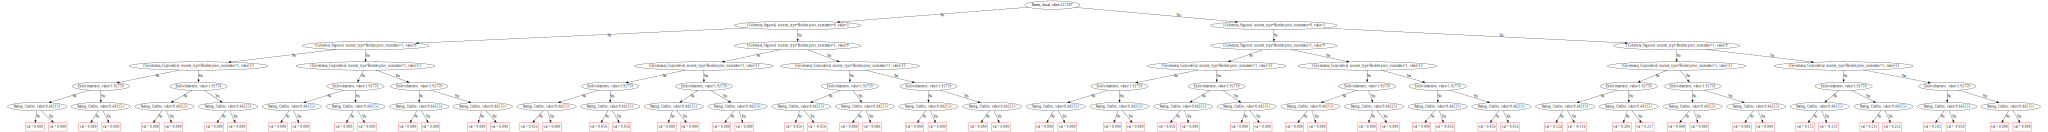

In [39]:
# Visualizar exemplo de árvore
modelo_catboost = ovr_model.estimators_[0]

# Pool com os dados de treinamento

pool = Pool(
    X_train,
    y_train.iloc[:,0],
    cat_features = list(features_categoricas.columns),
    feature_names=list(X_train.columns)
)

#plotar
modelo_catboost.plot_tree(tree_idx=0, pool=pool)
